In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sortedcontainers import SortedDict
import time
import datetime

In [349]:
user_name = 'TheScrasse'

In [350]:
### Preparing problems dataframe
prob = pd.read_csv('problems.csv').copy()
new_ind = pd.MultiIndex.from_frame(prob[['contestId','index']],names=['contestId','index'])
prob.drop(columns=['contestId','index'],inplace=True)
prob.set_index(new_ind,inplace=True)
prob.dropna(axis=0,inplace=True)

### example of accessing prob.loc[(2035,'H')].rating

In [351]:
prob.head(3)

name                          tags  \
contestId index                                                           
2035      H      Peak Productivity Forces   ['constructive algorithms']   
          G2     Go Learn! (Hard Version)  ['divide and conquer', 'dp']   
          G1     Go Learn! (Easy Version)               ['dp', 'trees']   

                 rating  
contestId index          
2035      H      3500.0  
          G2     3500.0  
          G1     3300.0

In [352]:
cont = pd.read_csv('contests.csv',index_col='id').copy()
cont.sort_values(by=['startTimeSeconds'],inplace=True)
cont.head(3)

,name,type,startTimeSeconds
id,,,
1,Codeforces Beta Round 1,ICPC,1266580800
2,Codeforces Beta Round 2,ICPC,1267117200
3,Codeforces Beta Round 3,ICPC,1267963200


In [353]:
df = pd.read_csv(f'Submissions/{user_name}.csv').copy()
df = df[df.contestId < 3000]
df.head(3)

,contestId,problem
0,2035,D
1,2035,F
2,2035,E


In [354]:
rate_prob = SortedDict()
for i in df.index:
    conId = df.loc[i].contestId
    index = df.loc[i].problem
    try:
        rating = int(prob.loc[(conId,index)].rating)
        try:
            rate_prob[rating] += 1
        except:
            rate_prob[rating] = 1
    except:
        pass

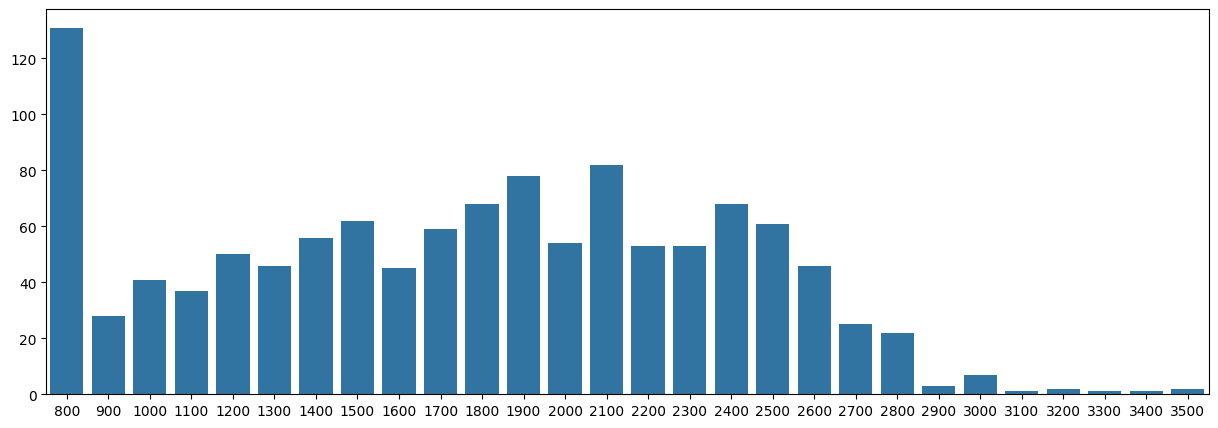

In [355]:
plt.figure(figsize=(15,5))
sns.barplot(x=dict(rate_prob).keys(),y=dict(rate_prob).values())
plt.show()

In [356]:
ranks = {
    'Pupil' : 1200,
    'Specialist' : 1400,
    'Expert' : 1600,
    'Candidate-Master' : 1900,
    'Master' : 2100,
    'International Master' : 2300,
    'Grandmaster' : 2400,
    'International Grandmaster' : 2600,
    'Legendary Grandmaster' : 3000,
    'Tourist' : 4000
}

In [357]:
reached = set()
cur = 1519149347
for id in cont.index:
    try:
        change = pd.read_csv(f'RatingChanges/{id}.csv',index_col='handle').copy()
        try:
            cont_time = cont.loc[id].startTimeSeconds
            date = datetime.date.fromtimestamp(cont_time)
            new_rating = change.loc[user_name].newRating
            for rank in ranks:
                if reached.__contains__(rank):
                    continue
                if new_rating >= ranks[rank]:
                    reached.add(rank)
                    print(f'Congrats on reaching {rank}!')
                    print('It took you',round((cont_time - cur)/(60*60*24*30),2),'months!')
                    print(new_rating,":",date)
                    print()
                    cur = cont_time
        except:
            pass
    except:
        pass

Congrats on reaching Pupil!
It took you 20.36 months!
1483 : 2019-10-24

Congrats on reaching Specialist!
It took you 0.0 months!
1483 : 2019-10-24

Congrats on reaching Expert!
It took you 2.9 months!
1655 : 2020-01-19

Congrats on reaching Candidate-Master!
It took you 2.4 months!
1963 : 2020-03-31

Congrats on reaching Master!
It took you 1.4 months!
2128 : 2020-05-12

Congrats on reaching International Master!
It took you 13.24 months!
2313 : 2021-06-13

Congrats on reaching Grandmaster!
It took you 0.93 months!
2447 : 2021-07-11

Congrats on reaching International Grandmaster!
It took you 24.33 months!
2634 : 2023-07-11



In [380]:
mp = SortedDict()
for i in df.index:
    try:
        conId = df.loc[i].contestId
        index = df.loc[i].problem
        tags = eval(prob.loc[(conId,index)].tags)
        for tag in tags:
            try:
                mp[tag] += 1
            except:
                mp[tag] = 1
    except:
        pass

In [386]:
pd.Series(data=mp).sort_values(ascending=False)[:10]

greedy                     506
math                       450
dp                         342
constructive algorithms    317
implementation             276
brute force                241
data structures            217
sortings                   171
graphs                     167
binary search              156
dtype: int64

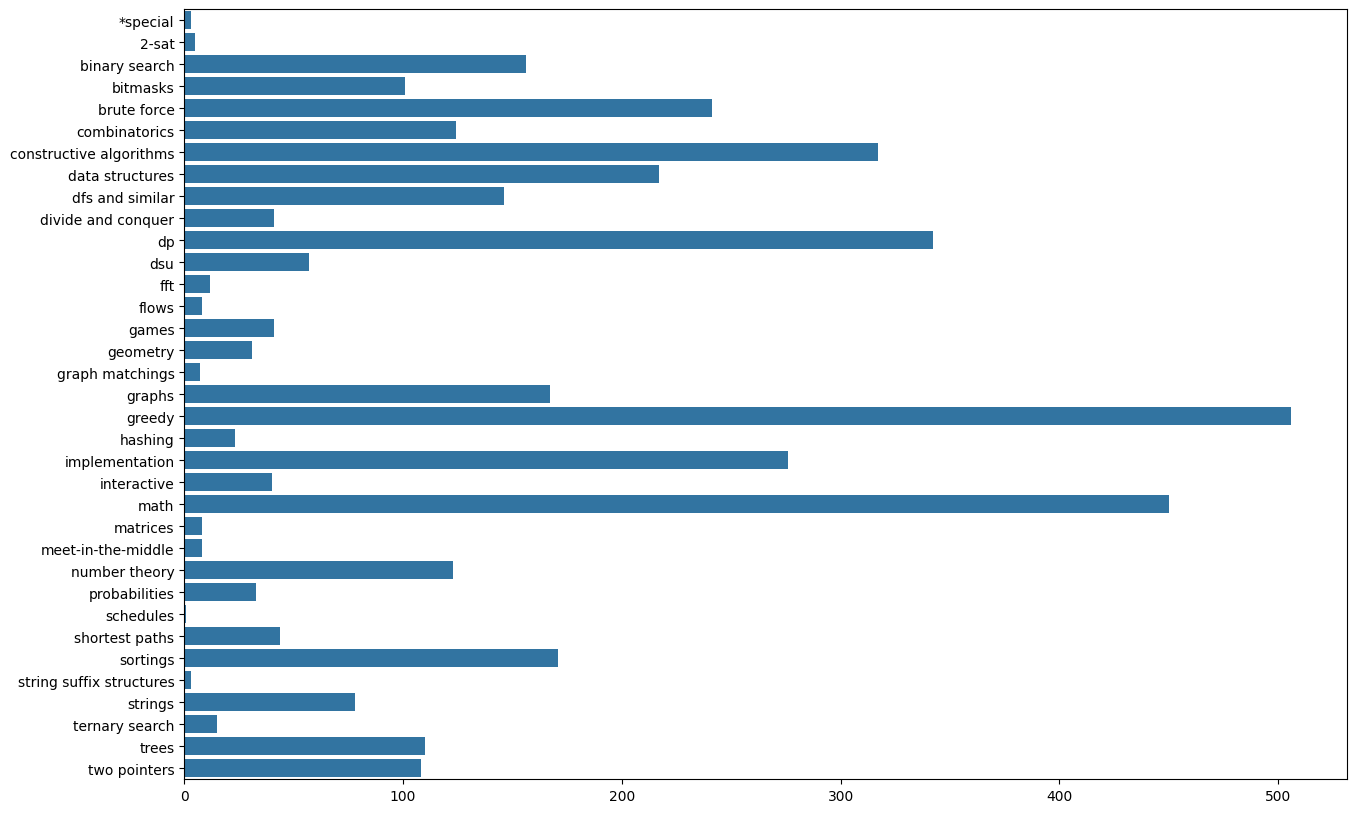

In [378]:
plt.figure(figsize=(15,10))
sns.barplot(y=mp.keys(),x=mp.values(),orient='h')
plt.show()